# Dogecoin Price Prediction

### Analysis + Prediction ~ DogeCoin

### Author  : Saurabh

In [1]:
pwd

'E:\\DataScience\\MachineLearning\\Dogecoin Historical Data'

In [2]:
path='E:\\DataScience\\MachineLearning\\Dogecoin Historical Data'

In [4]:
import os
os.listdir()

['.ipynb_checkpoints',
 'DOGE-USD.csv',
 'Dogecoin Historical Data.zip',
 'Dogecoin Price Prediction.ipynb']

## Importing Libraries and Dataset

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv(path+'\DOGE-USD.csv')

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


In [9]:
df1 = df.tail(135)
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1626,2022-04-23,0.136387,0.136495,0.133810,0.134241,0.134241,3.497401e+08
1627,2022-04-24,0.134202,0.134690,0.131502,0.131947,0.131947,4.366202e+08
1628,2022-04-25,0.131936,0.167735,0.123869,0.157959,0.157959,5.177824e+09
1629,2022-04-26,0.157777,0.165278,0.137424,0.137767,0.137767,4.529011e+09
1630,2022-04-27,0.137847,0.145405,0.136272,0.139700,0.139700,1.765371e+09


In [10]:
df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [15]:
#list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>0]
 
#print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

Open 0.0006  % missing values
High 0.0006  % missing values
Low 0.0006  % missing values
Close 0.0006  % missing values
Adj Close 0.0006  % missing values
Volume 0.0006  % missing values


## Data Visualization

Text(0.5, 1.0, 'Date vs Volume')

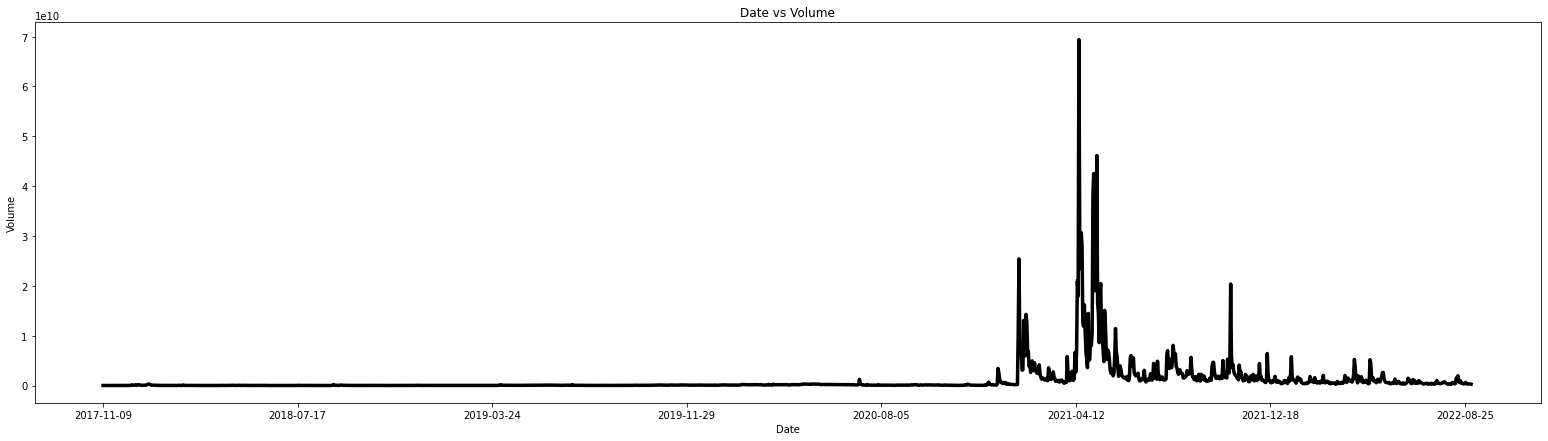

In [16]:
# A. Date v/s Volumn Graph
plt.figure(figsize=(27,7))
df.groupby('Date')['Volume'].median().plot(linewidth = 3.5, color = 'k')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Volume")

Text(0.5, 1.0, 'Date vs Volume of 2022')

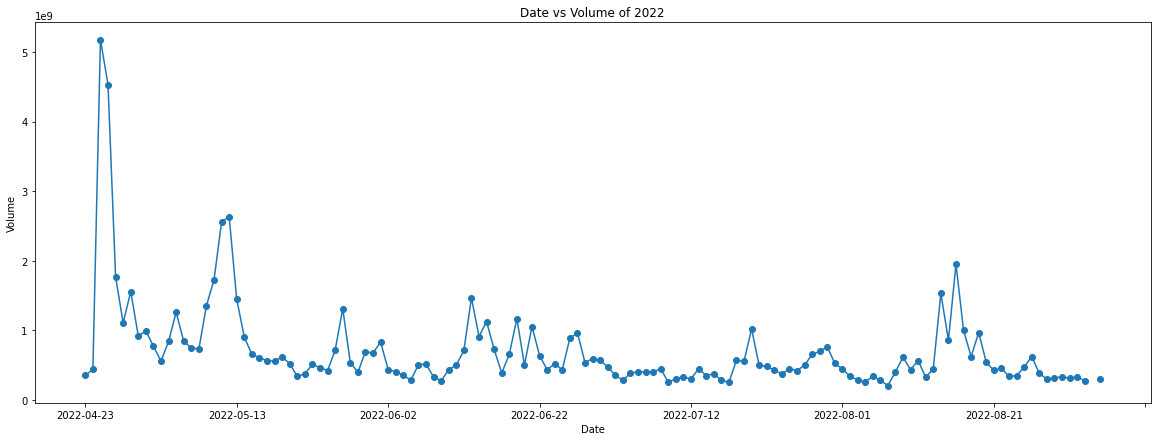

In [18]:
#B. Performance of Dogecoin in the year 2022

plt.figure(figsize=(20,7))
df1.groupby('Date')['Volume'].mean().plot(linewidth = 1.5, marker ='o')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Volume of 2022")

Text(0.5, 1.0, 'Date vs Open of 2022')

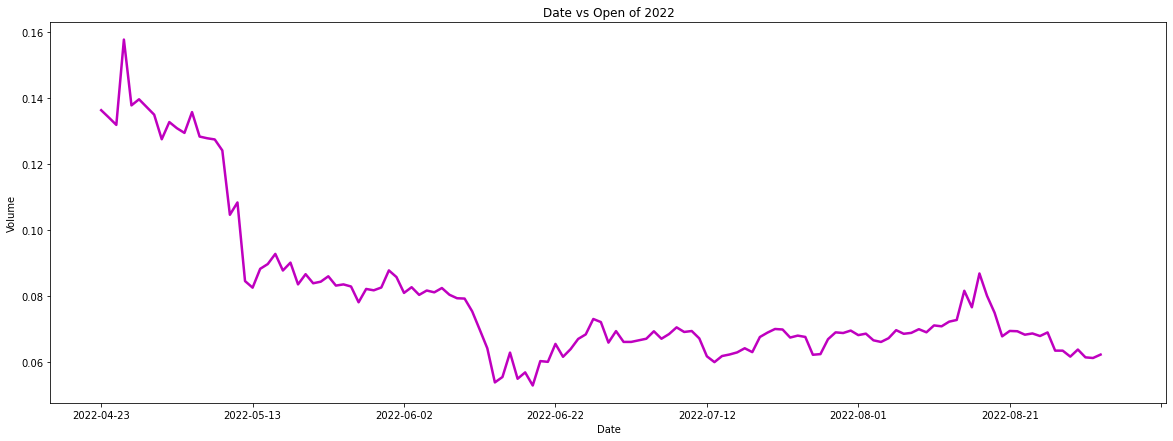

In [19]:
#C. Opening price for Dogecoin everyday throughout the year 2022

plt.figure(figsize=(20,7))
df1.groupby('Date')['Open'].mean().plot(linewidth = 2.5, color = 'm')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Open of 2022")

Text(0.5, 1.0, 'Date vs High of 2022')

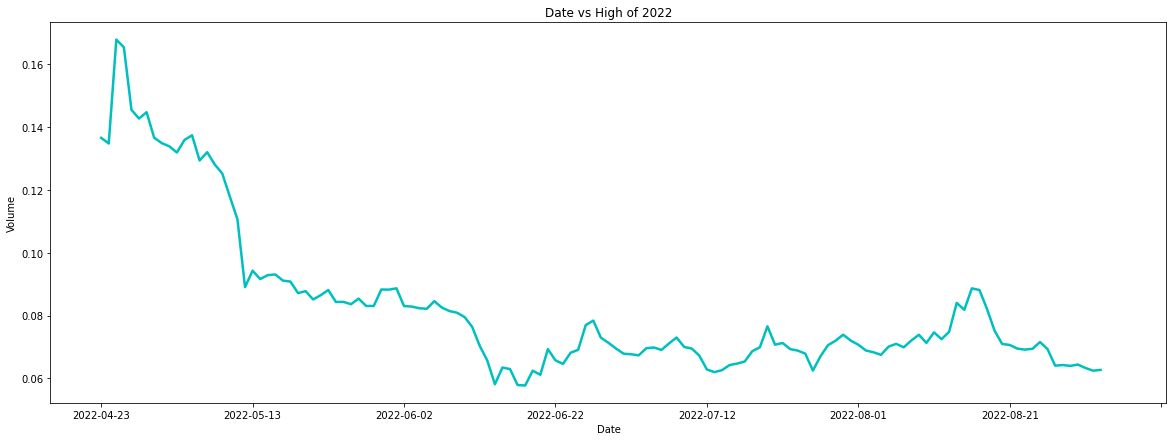

In [20]:
#D. Maximum price achieved by Dogecoin everyday throughout the year 2022

plt.figure(figsize=(20,7))
df1.groupby('Date')['High'].mean().plot(linewidth = 2.5, color = 'c')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs High of 2022")

Text(0.5, 1.0, 'Date vs Low of 2022')

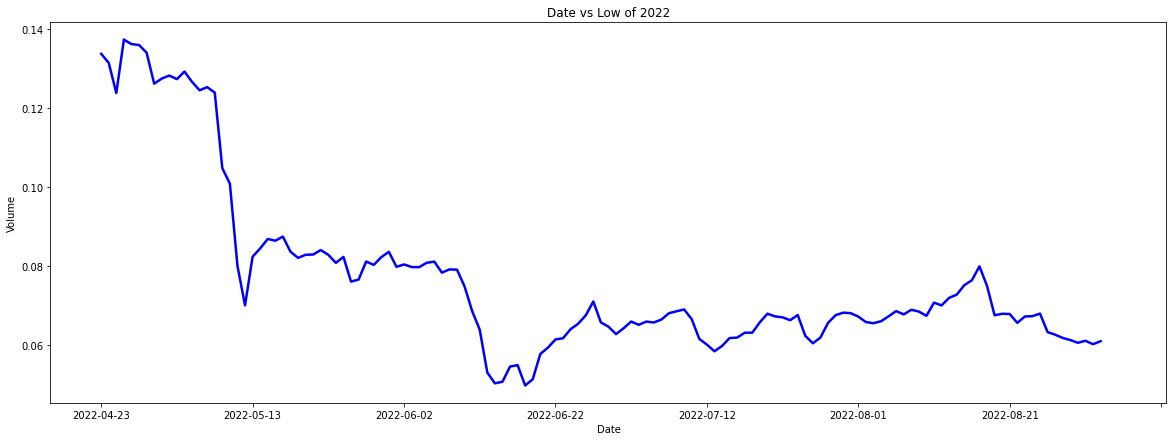

In [21]:
#E. Lowest price achieved by Dogecoin everyday throughout the year 2022

plt.figure(figsize=(20,7))
df1.groupby('Date')['Low'].mean().plot(linewidth = 2.5, color = 'b')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Low of 2022")

Text(0.5, 1.0, 'Date vs Close of 2022')

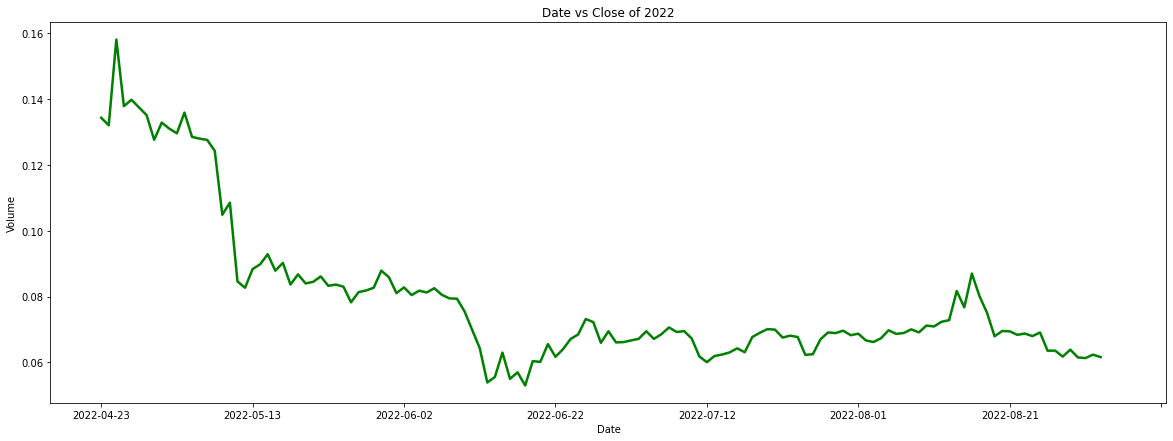

In [22]:
#F. Closing price achieved by Dogecoin everyday throughout the year 2022

plt.figure(figsize=(20,7))
df1.groupby('Date')['Close'].mean().plot(linewidth = 2.5, color = 'g')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Close of 2022")

Text(0.5, 1.0, 'Date vs Close of 2022')

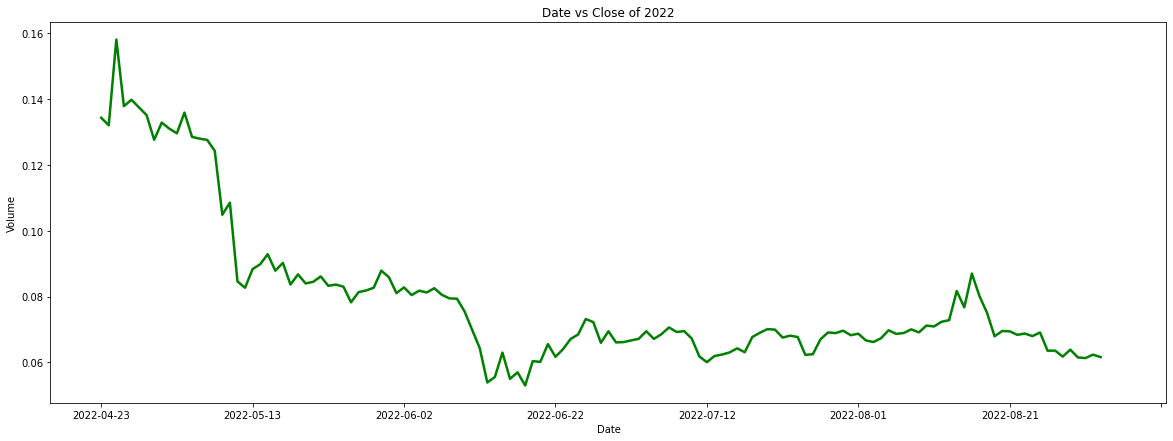

In [23]:
#F. Closing price achieved by Dogecoin everyday throughout the year 2022

plt.figure(figsize=(20,7))
df1.groupby('Date')['Close'].mean().plot(linewidth = 2.5, color = 'g')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Close of 2022")

In [24]:
#G. Lets Check the correlation between features of the dataset. How much they close to eachother.
new_df =pd.read_csv('DOGE-USD.csv', usecols = ['Open','High','Low','Close','Volume']).fillna(method='ffill')


<AxesSubplot:>

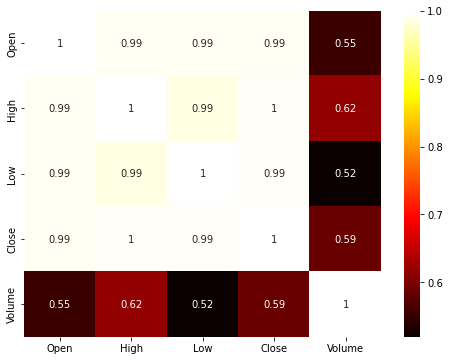

In [25]:
plt.figure(figsize = (8,6))
sns.heatmap(new_df.corr() , cmap = 'hot', annot = True)

## Prediction Models

In [26]:
#Training and Testing Dataset Spliting using the train_test_split
X = new_df.drop('High', axis=1)
y = new_df['High']

print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (1761, 4)
Shape of y =  (1761,)


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (1232, 4)
Shape of y_train =  (1232,)
Shape of X_test =  (529, 4)
Shape of y_test =  (529,)


### Random Forest Regression

In [28]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=500, criterion='mse',random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=0)

In [30]:
y_pred = regressor.predict(X_test)

In [31]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 0.0018077270321360812
Residual Sum of Squares(MSE): 3.697853055562475e-05
R2-Score: 0.9969859221987957


In [32]:
ds = pd.DataFrame()
ds['High']=y_test

In [33]:
ds['Prediction']=y_pred
ds.head(11)

,High,Prediction
966,0.002382,0.002375
1524,0.164621,0.155232
1580,0.119724,0.118779
816,0.002517,0.002483
1026,0.003308,0.003333
1007,0.003534,0.003590
1425,0.247924,0.248276
1517,0.172339,0.174053
1419,0.202579,0.206725
1531,0.173790,0.173947


<AxesSubplot:>

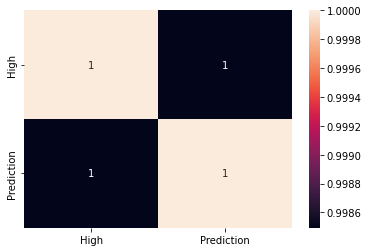

In [34]:
sns.heatmap(ds.corr(), annot = True)

###  Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = regr.predict(X_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 0.001391766039375
Residual Sum of Squares(MSE): 1.639277904215553e-05
R2-Score: 0.9986638432985679


In [37]:
y_pred = regressor.predict(X_test)
ds = pd.DataFrame()
ds['High']=y_test
ds['Prediction']=y_pred
ds.head(11)

,High,Prediction
966,0.002382,0.002375
1524,0.164621,0.155232
1580,0.119724,0.118779
816,0.002517,0.002483
1026,0.003308,0.003333
1007,0.003534,0.003590
1425,0.247924,0.248276
1517,0.172339,0.174053
1419,0.202579,0.206725
1531,0.173790,0.173947


<AxesSubplot:>

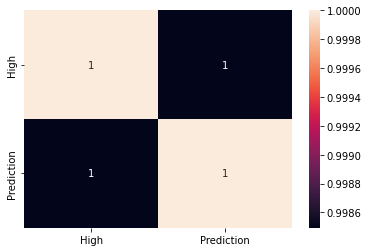

In [38]:
sns.heatmap(ds.corr(), annot = True)

### Decision Tree Regressor

In [40]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [41]:
y_pred = dtr.predict(X_test)
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 0.0027363402646502833
Residual Sum of Squares(MSE): 0.00011347655224196599
R2-Score: 0.990750655801338


In [42]:
y_pred = regressor.predict(X_test)
ds = pd.DataFrame()
ds['High']=y_test
ds['Prediction']=y_pred
ds.head(11)

,High,Prediction
966,0.002382,0.002375
1524,0.164621,0.155232
1580,0.119724,0.118779
816,0.002517,0.002483
1026,0.003308,0.003333
1007,0.003534,0.003590
1425,0.247924,0.248276
1517,0.172339,0.174053
1419,0.202579,0.206725
1531,0.173790,0.173947


<AxesSubplot:>

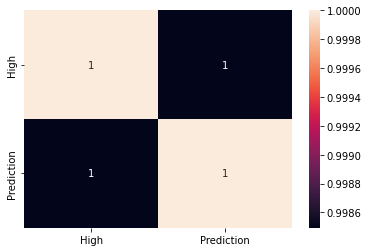

In [43]:
sns.heatmap(ds.corr(), annot = True)

## CONCLUSION :
 1. Linear Regression ~ 99.86
 2. Decision Tree Regressor ~ 99.07
 3. Random Forest ~ 99.69
    